In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


metadata = pd.read_csv("D:/Sync/Profissional/Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/metadata/metadata.csv")

In [24]:
metadata['site_id'].unique()

array(['Panther', 'Robin', 'Fox', 'Rat', 'Bear', 'Lamb', 'Peacock',
       'Moose', 'Gator', 'Bull', 'Bobcat', 'Crow', 'Shrew', 'Swan',
       'Wolf', 'Hog', 'Eagle', 'Cockatoo', 'Mouse'], dtype=object)

# Dados de consumo energético

In [3]:
df_energia = pd.read_csv("D:/Sync/Profissional/Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/meters/raw/electricity.csv", index_col='timestamp', parse_dates=True)

# Selecionando um subgrupo de acordo com o uso
grupo_edu = [column for column in df_energia.columns if '_education_' in df_energia[column].name]
df_energia_edu = df_energia.loc[:,grupo_edu]

In [4]:
# Preenchendo os dados zerados
df_energia_edu.replace(to_replace=0, method='ffill', inplace=True)
df_energia_edu.replace(to_replace=0, method='bfill', inplace=True)

# Checando se tem valores zerados
for col in df_energia_edu.columns:
    column = df_energia_edu[col]
    count = (column == 0).sum()
    if count > 0:
        print(col, count)
if count == 0:
    print("Não existem valores zerados.")


Não existem valores zerados.


In [5]:
# Preenchendo valores nulos
df_energia_edu.fillna(method="ffill", inplace=True)

# Seccionando o conjunto para o período de 1 ano
df_energia_edu = df_energia_edu.truncate(before='2016-06-01', after='2017-06-01')

# Transformando os valores para uma média diária
df_energia_edu = df_energia_edu.resample("D").mean()

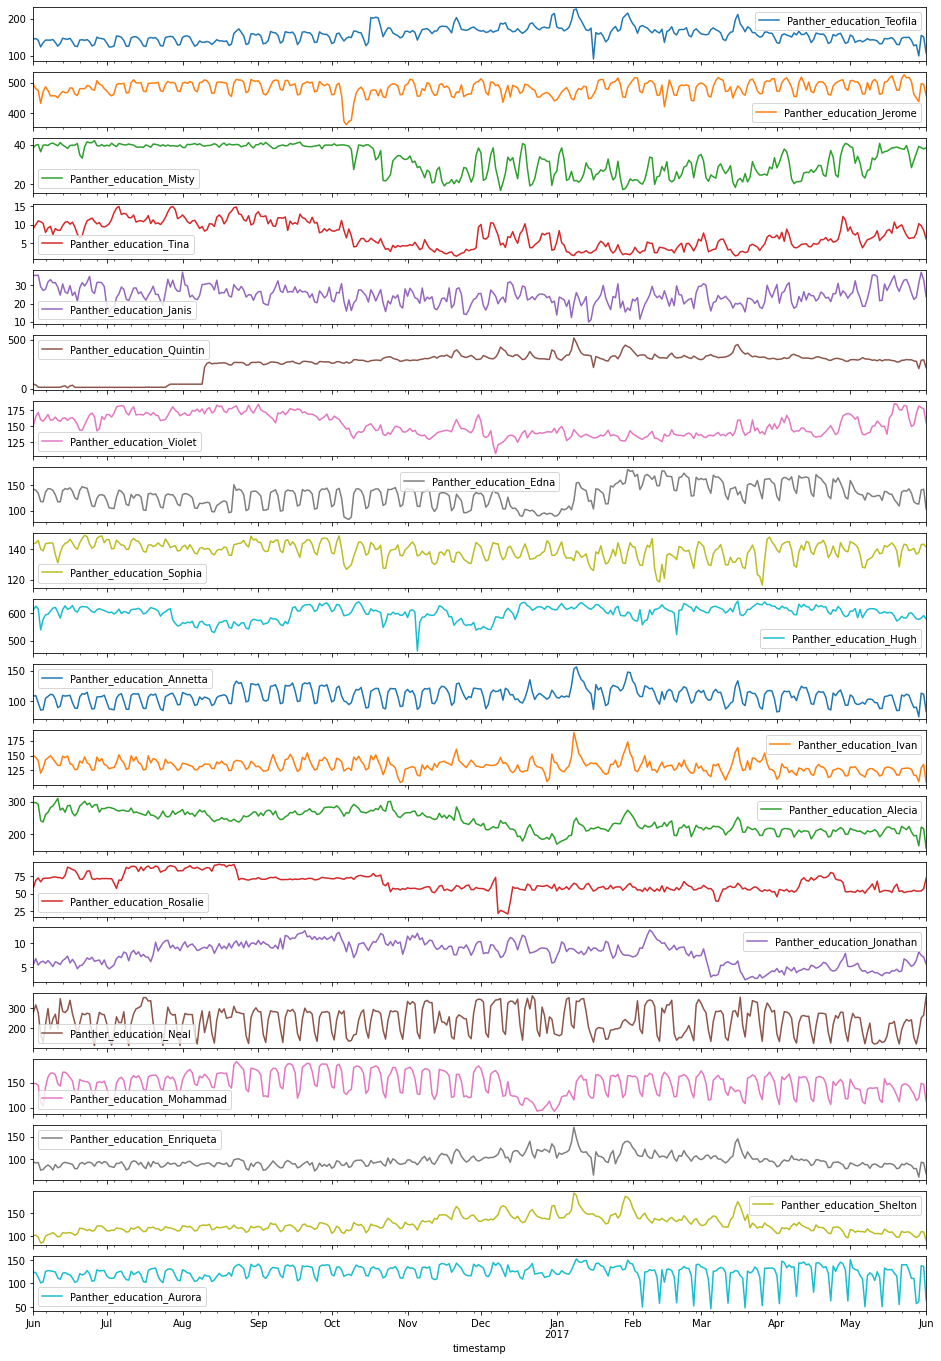

In [6]:
df_energia_edu.iloc[:,:20].plot(figsize=(16, 24), subplots=True)
plt.show()

In [7]:
# Dividindo os valores energéticos do conjunto pela área total do edifício

df_sqm = metadata[['building_id', 'sqm']]
df_sqm

df_energia_edu_normal = df_energia_edu.copy()

df_energia_edu_normal

for col in df_energia_edu_normal.columns:
    area_total = df_sqm.loc[df_sqm['building_id'] == col, 'sqm'].values[0]
    df_energia_edu_normal[col] = df_energia_edu_normal[col] / area_total
df_energia_edu_normal


,Panther_education_Teofila,Panther_education_Jerome,Panther_education_Misty,Panther_education_Tina,Panther_education_Janis,Panther_education_Quintin,Panther_education_Violet,Panther_education_Edna,Panther_education_Sophia,Panther_education_Hugh,...,Cockatoo_education_Julio,Cockatoo_education_Julia,Cockatoo_education_Janet,Cockatoo_education_Minh,Cockatoo_education_Oliver,Cockatoo_education_Marva,Cockatoo_education_June,Cockatoo_education_Lionel,Cockatoo_education_Amira,Cockatoo_education_Tyler
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-01,0.016612,0.041276,0.152199,0.012135,0.034771,0.004605,0.206543,0.014371,0.031519,0.058897,...,0.019770,0.007459,0.035522,0.009002,0.010863,0.013880,0.010996,0.027798,0.019985,0.040899
2016-06-02,0.016823,0.040135,0.157411,0.013514,0.034747,0.003709,0.225264,0.014191,0.031658,0.060183,...,0.020752,0.007865,0.036280,0.011075,0.011237,0.013598,0.011239,0.027789,0.020599,0.040685
2016-06-03,0.016236,0.039675,0.158519,0.014854,0.034944,0.001661,0.234022,0.013567,0.032020,0.059242,...,0.017884,0.008089,0.035849,0.010840,0.011099,0.014482,0.011045,0.027362,0.021797,0.040460
2016-06-04,0.014206,0.036178,0.144125,0.014551,0.028695,0.001522,0.218750,0.011954,0.030758,0.051872,...,0.015998,0.007801,0.031879,0.009290,0.009674,0.012346,0.009718,0.025252,0.021273,0.039378
2016-06-05,0.015479,0.039300,0.157252,0.013946,0.026720,0.001522,0.215648,0.011878,0.030502,0.055553,...,0.017373,0.007374,0.031944,0.010895,0.009598,0.012056,0.009451,0.025349,0.022603,0.038950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-28,0.014825,0.037674,0.141288,0.010346,0.023089,0.026519,0.231558,0.011520,0.030027,0.055755,...,0.016109,0.006296,0.033752,0.008361,0.009377,0.013636,0.009499,0.023942,0.018777,0.036327
2017-05-29,0.011381,0.036610,0.154930,0.013839,0.030555,0.019453,0.247779,0.011443,0.030265,0.055560,...,0.016485,0.006572,0.033695,0.007376,0.009742,0.012576,0.010538,0.024756,0.017685,0.036706
2017-05-30,0.017773,0.041541,0.152490,0.013093,0.036471,0.027544,0.244276,0.014224,0.031405,0.055979,...,0.018087,0.007206,0.035820,0.006979,0.011130,0.015172,0.011533,0.026584,0.025044,0.038005


### Exportar conjunto de dados

In [8]:
df_energia_edu.to_csv("../data/processed_data/df_energia_edu.csv")
df_energia_edu_normal.to_csv("../data/processed_data/df_energia_edu_normal.csv")

# Dados de temperatura do ar

In [9]:
df_temperatura = pd.read_csv("D:/Sync/Profissional/Análise de Dados/Conjunto de Dados/building-data-genome-project-2/data/weather/weather.csv", index_col='timestamp', parse_dates=True)

# Selecionando temperatura do ar
df_temperatura = df_temperatura.iloc[:, :2]

# Mudando a estrutura do conjunto para que o 'timestamp' não tenha datas repetidas
df_temperatura = df_temperatura.pivot(columns='site_id', values='airTemperature')


# Preenchendo valores vazios
df_temperatura.fillna(method='ffill', inplace=True)


df_temperatura.isna().sum()

site_id
Bear        0
Bobcat      0
Bull        0
Cockatoo    7
Crow        0
Eagle       0
Fox         0
Gator       0
Hog         0
Lamb        1
Moose       0
Mouse       0
Panther     0
Peacock     0
Rat         0
Robin       0
Shrew       0
Swan        0
Wolf        0
dtype: int64

site_id,Bear,Bobcat,Bull,Cockatoo,Crow,Eagle,Fox,Gator,Hog,Lamb,Moose,Mouse,Panther,Peacock,Rat,Robin,Shrew,Swan,Wolf
timestamp,,,,,,,,,,,,,,,,,,,
2016-06-01,16.316667,18.658333,24.704167,18.400000,17.862500,23.537500,32.362500,26.600000,16.975000,16.208333,17.862500,12.754167,26.600000,24.279167,25.341667,12.754167,12.754167,19.016667,12.862500
2016-06-02,17.300000,20.783333,23.845833,20.220833,19.029167,20.079167,33.962500,27.620833,18.204167,14.291667,19.029167,11.250000,27.620833,23.137500,23.291667,11.250000,11.250000,20.379167,12.154167
2016-06-03,20.562500,20.858333,23.200000,21.133333,20.333333,19.420833,36.062500,28.104167,18.354167,13.166667,20.333333,11.320833,28.104167,23.166667,23.541667,11.320833,11.320833,23.529167,11.687500
2016-06-04,18.429167,23.175000,23.429167,20.650000,20.520833,23.283333,37.625000,28.475000,18.041667,15.208333,20.520833,15.625000,28.475000,23.266667,24.120833,15.625000,15.625000,21.454167,13.316667
2016-06-05,16.387500,24.879167,25.391667,19.679167,17.379167,21.570833,37.587500,26.795833,20.833333,19.041667,17.379167,17.291667,26.795833,23.045833,24.287500,17.291667,17.291667,19.037500,16.908333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-28,14.812500,16.591667,26.683333,18.270833,19.337500,17.995833,31.016667,25.929167,17.608333,16.333333,19.337500,17.291667,25.929167,19.254167,19.395833,17.291667,17.291667,15.058333,12.120833
2017-05-29,14.095833,19.604167,24.595833,16.358333,15.958333,14.570833,32.195833,27.779167,14.879167,15.791667,15.958333,17.375000,27.779167,22.750000,22.191667,17.375000,17.375000,14.520833,13.558333
2017-05-30,14.375000,21.354167,25.508333,16.241667,16.200000,14.616667,32.475000,27.225000,13.187500,14.458333,16.200000,17.400000,27.225000,22.616667,19.187500,17.400000,17.400000,15.020833,14.679167


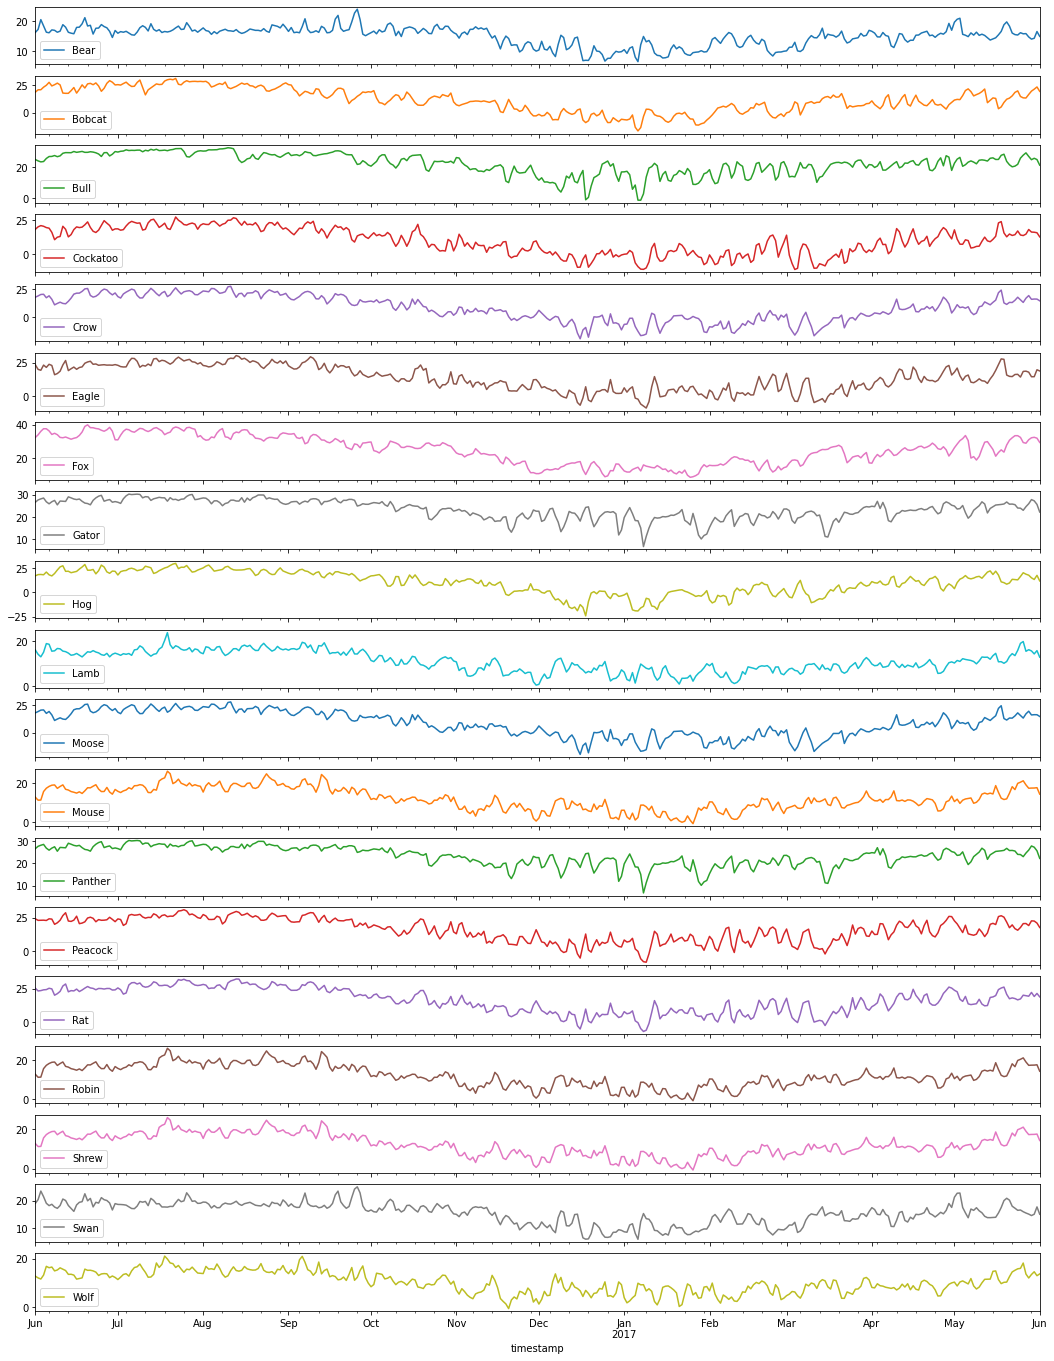

In [10]:
# Seccionando o conjunto para o período de 1 ano
df_temperatura = df_temperatura.truncate(before='2016-06-01', after='2017-06-01')

# Transformando para média diária
df_temperatura = df_temperatura.resample('D').mean() 

df_temperatura.plot(figsize=(18,24), subplots=True)
df_temperatura

### Exportar conjunto de dados

In [11]:
df_temperatura.to_csv("../data/processed_data/df_temperatura.csv")

# Combinação dos dados

In [12]:
df_combinado = pd.concat([df_energia_edu_normal, df_temperatura], axis=1)
df_combinado

,Panther_education_Teofila,Panther_education_Jerome,Panther_education_Misty,Panther_education_Tina,Panther_education_Janis,Panther_education_Quintin,Panther_education_Violet,Panther_education_Edna,Panther_education_Sophia,Panther_education_Hugh,...,Lamb,Moose,Mouse,Panther,Peacock,Rat,Robin,Shrew,Swan,Wolf
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-01,0.016612,0.041276,0.152199,0.012135,0.034771,0.004605,0.206543,0.014371,0.031519,0.058897,...,16.208333,17.862500,12.754167,26.600000,24.279167,25.341667,12.754167,12.754167,19.016667,12.862500
2016-06-02,0.016823,0.040135,0.157411,0.013514,0.034747,0.003709,0.225264,0.014191,0.031658,0.060183,...,14.291667,19.029167,11.250000,27.620833,23.137500,23.291667,11.250000,11.250000,20.379167,12.154167
2016-06-03,0.016236,0.039675,0.158519,0.014854,0.034944,0.001661,0.234022,0.013567,0.032020,0.059242,...,13.166667,20.333333,11.320833,28.104167,23.166667,23.541667,11.320833,11.320833,23.529167,11.687500
2016-06-04,0.014206,0.036178,0.144125,0.014551,0.028695,0.001522,0.218750,0.011954,0.030758,0.051872,...,15.208333,20.520833,15.625000,28.475000,23.266667,24.120833,15.625000,15.625000,21.454167,13.316667
2016-06-05,0.015479,0.039300,0.157252,0.013946,0.026720,0.001522,0.215648,0.011878,0.030502,0.055553,...,19.041667,17.379167,17.291667,26.795833,23.045833,24.287500,17.291667,17.291667,19.037500,16.908333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-28,0.014825,0.037674,0.141288,0.010346,0.023089,0.026519,0.231558,0.011520,0.030027,0.055755,...,16.333333,19.337500,17.291667,25.929167,19.254167,19.395833,17.291667,17.291667,15.058333,12.120833
2017-05-29,0.011381,0.036610,0.154930,0.013839,0.030555,0.019453,0.247779,0.011443,0.030265,0.055560,...,15.791667,15.958333,17.375000,27.779167,22.750000,22.191667,17.375000,17.375000,14.520833,13.558333
2017-05-30,0.017773,0.041541,0.152490,0.013093,0.036471,0.027544,0.244276,0.014224,0.031405,0.055979,...,14.458333,16.200000,17.400000,27.225000,22.616667,19.187500,17.400000,17.400000,15.020833,14.679167


### Exportar conjunto de dados

In [13]:
df_combinado.to_csv("../data/processed_data/df_combinado.csv")

# Categorizando os edifícios por Tamanho

In [14]:
df_energia_edu_normal_total = df_energia_edu_normal.sum().to_frame(name='total_consumption')
df_energia_edu_normal_total.reset_index(inplace=True)
df_energia_edu_normal_total = df_energia_edu_normal_total.rename(columns={'index': 'building_id'})
df_energia_edu_normal_total

,building_id,total_consumption
0,Panther_education_Teofila,6.588486
1,Panther_education_Jerome,14.757975
2,Panther_education_Misty,47.143603
3,Panther_education_Tina,3.491371
4,Panther_education_Janis,8.834086
...,...,...
599,Cockatoo_education_Marva,5.751700
600,Cockatoo_education_June,3.917425
601,Cockatoo_education_Lionel,10.206529
602,Cockatoo_education_Amira,6.345439


In [15]:
df_energia_edu_total = df_energia_edu.sum().to_frame(name='total_consumption')
df_energia_edu_total.reset_index(inplace=True)
df_energia_edu_total = df_energia_edu_total.rename(columns={'index': 'building_id'})
df_energia_edu_total

,building_id,total_consumption
0,Panther_education_Teofila,57473.338937
1,Panther_education_Jerome,176711.996971
2,Panther_education_Misty,11913.188596
3,Panther_education_Tina,2594.787104
4,Panther_education_Janis,8971.898083
...,...,...
599,Cockatoo_education_Marva,58228.488888
600,Cockatoo_education_June,38436.602083
601,Cockatoo_education_Lionel,119008.131250
602,Cockatoo_education_Amira,16760.843063


In [16]:
df_sub_metadata = metadata.loc[:,['building_id', 'sqm', 'yearbuilt', 'lat', 'lng']]
selection_edu = [row for row in df_sub_metadata['building_id'] if '_education_' in row]
selection_edu
df_sub_metadata = df_sub_metadata.loc[df_sub_metadata['building_id'].isin(selection_edu), :]
df_sub_metadata

,building_id,sqm,yearbuilt,lat,lng
3,Panther_education_Rosalie,690.5,2008.0,28.517689,-81.379039
4,Panther_education_Misty,252.7,2004.0,28.517689,-81.379039
6,Panther_education_Mattie,499.4,1991.0,28.517689,-81.379039
8,Panther_education_Diann,2200.4,2002.0,28.517689,-81.379039
9,Panther_education_Gina,10833.1,1975.0,28.517689,-81.379039
...,...,...,...,...,...
1618,Cockatoo_education_Marva,10123.7,1990.0,42.459837,-76.485292
1619,Cockatoo_education_Collin,5248.7,1957.0,42.459837,-76.485292
1621,Cockatoo_education_Gussie,2800.4,1951.0,42.459837,-76.485292
1623,Cockatoo_education_Arlen,3745.0,1913.0,42.459837,-76.485292


In [17]:
df_categorizado = df_energia_edu_normal_total.merge(df_sub_metadata, on='building_id')
df_categorizado

,building_id,total_consumption,sqm,yearbuilt,lat,lng
0,Panther_education_Teofila,6.588486,8723.3,1999.0,28.517689,-81.379039
1,Panther_education_Jerome,14.757975,11974.0,2009.0,28.517689,-81.379039
2,Panther_education_Misty,47.143603,252.7,2004.0,28.517689,-81.379039
3,Panther_education_Tina,3.491371,743.2,2000.0,28.517689,-81.379039
4,Panther_education_Janis,8.834086,1015.6,1986.0,28.517689,-81.379039
...,...,...,...,...,...,...
599,Cockatoo_education_Marva,5.751700,10123.7,1990.0,42.459837,-76.485292
600,Cockatoo_education_June,3.917425,9811.7,1967.0,42.459837,-76.485292
601,Cockatoo_education_Lionel,10.206529,11660.0,1974.0,42.459837,-76.485292
602,Cockatoo_education_Amira,6.345439,2641.4,1933.0,42.459837,-76.485292


In [18]:
def categoria_tamanho(x):
    if x < 1000:
        return 'Pequeno'
    if 1001 < x < 8000:
        return 'Medio'
    if x > 8001:
        return 'Grande'

df_categorizado['tamanho'] = df_categorizado['sqm'].apply(lambda x: categoria_tamanho(x))
df_categorizado

,building_id,total_consumption,sqm,yearbuilt,lat,lng,tamanho
0,Panther_education_Teofila,6.588486,8723.3,1999.0,28.517689,-81.379039,Grande
1,Panther_education_Jerome,14.757975,11974.0,2009.0,28.517689,-81.379039,Grande
2,Panther_education_Misty,47.143603,252.7,2004.0,28.517689,-81.379039,Pequeno
3,Panther_education_Tina,3.491371,743.2,2000.0,28.517689,-81.379039,Pequeno
4,Panther_education_Janis,8.834086,1015.6,1986.0,28.517689,-81.379039,Medio
...,...,...,...,...,...,...,...
599,Cockatoo_education_Marva,5.751700,10123.7,1990.0,42.459837,-76.485292,Grande
600,Cockatoo_education_June,3.917425,9811.7,1967.0,42.459837,-76.485292,Grande
601,Cockatoo_education_Lionel,10.206529,11660.0,1974.0,42.459837,-76.485292,Grande
602,Cockatoo_education_Amira,6.345439,2641.4,1933.0,42.459837,-76.485292,Medio


In [19]:
def categoria_ano(x):
    if x <= 1900:
        return '?-1900'
    if 1901 < x <= 1950:
        return '1901-1950'
    if 1951 < x <= 2000:
        return '1951-2000'
    if x > 2000:
        return '2000-...'

df_categorizado['período_construção'] = df_categorizado['yearbuilt'].apply(lambda x : categoria_ano(x))

df_categorizado

,building_id,total_consumption,sqm,yearbuilt,lat,lng,tamanho,período_construção
0,Panther_education_Teofila,6.588486,8723.3,1999.0,28.517689,-81.379039,Grande,1951-2000
1,Panther_education_Jerome,14.757975,11974.0,2009.0,28.517689,-81.379039,Grande,2000-...
2,Panther_education_Misty,47.143603,252.7,2004.0,28.517689,-81.379039,Pequeno,2000-...
3,Panther_education_Tina,3.491371,743.2,2000.0,28.517689,-81.379039,Pequeno,1951-2000
4,Panther_education_Janis,8.834086,1015.6,1986.0,28.517689,-81.379039,Medio,1951-2000
...,...,...,...,...,...,...,...,...
599,Cockatoo_education_Marva,5.751700,10123.7,1990.0,42.459837,-76.485292,Grande,1951-2000
600,Cockatoo_education_June,3.917425,9811.7,1967.0,42.459837,-76.485292,Grande,1951-2000
601,Cockatoo_education_Lionel,10.206529,11660.0,1974.0,42.459837,-76.485292,Grande,1951-2000
602,Cockatoo_education_Amira,6.345439,2641.4,1933.0,42.459837,-76.485292,Medio,1901-1950


In [21]:
def categoria_continente(x):
    if x < -30:
        return 'América do Norte'
    else:
        return 'Europa'

df_categorizado['continente'] = df_categorizado['lng'].apply(lambda x : categoria_continente(x))
df_categorizado

,building_id,total_consumption,sqm,yearbuilt,lat,lng,tamanho,período_construção,continente
0,Panther_education_Teofila,6.588486,8723.3,1999.0,28.517689,-81.379039,Grande,1951-2000,América do Norte
1,Panther_education_Jerome,14.757975,11974.0,2009.0,28.517689,-81.379039,Grande,2000-...,América do Norte
2,Panther_education_Misty,47.143603,252.7,2004.0,28.517689,-81.379039,Pequeno,2000-...,América do Norte
3,Panther_education_Tina,3.491371,743.2,2000.0,28.517689,-81.379039,Pequeno,1951-2000,América do Norte
4,Panther_education_Janis,8.834086,1015.6,1986.0,28.517689,-81.379039,Medio,1951-2000,América do Norte
...,...,...,...,...,...,...,...,...,...
599,Cockatoo_education_Marva,5.751700,10123.7,1990.0,42.459837,-76.485292,Grande,1951-2000,América do Norte
600,Cockatoo_education_June,3.917425,9811.7,1967.0,42.459837,-76.485292,Grande,1951-2000,América do Norte
601,Cockatoo_education_Lionel,10.206529,11660.0,1974.0,42.459837,-76.485292,Grande,1951-2000,América do Norte
602,Cockatoo_education_Amira,6.345439,2641.4,1933.0,42.459837,-76.485292,Medio,1901-1950,América do Norte


### Exportar base de dados

In [22]:
df_categorizado.to_csv("../data/processed_data/df_categorizado.csv")
df_energia_edu_normal_total.to_csv("../data/processed_data/df_energia_edu_normal_total.csv")
df_energia_edu_total.to_csv("../data/processed_data/df_energia_edu_total.csv")